In [1]:
# Notebook: SciKit Learn Principal Component Analysis
# Author: Thomas Purk
# Date: 2025-03-30
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# Reference: https://www.ibm.com/think/topics/principal-component-analysis
# Reference: https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/

# Principal Component Analysis (PCA)

> Principal component analysis, or PCA, reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components.

> PCA is commonly used for data preprocessing for use with machine learning algorithms. It can extract the most informative features from large datasets while preserving the most relevant information from the initial dataset. This reduces model complexity as the addition of each new feature negatively impacts model performance, which is also commonly referred to as the “curse of dimensionality.”

[https://www.ibm.com/think/topics/principal-component-analysis](https://www.ibm.com/think/topics/principal-component-analysis)

**Dataset**

> Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

Data will be loaded from SciKit Learn's built in datasets. But could also be loaded directly from the UCI Machine Leaning Repository


The notebook builds on an exercise from the following course. [https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/](https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/)

And adds in lessons from the SciKit Learn example.  [https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html)

In [2]:
# Notebook Setup

# Data, Arrays, Linear Algebra
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Add for better Jupyter Notebook compatibility
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix

# Data
from sklearn.datasets import load_breast_cancer

# Prevent Pandas and other warnings from displaying above outputcells, improve readability
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # See warnings one time#

In [3]:
# Load Data
breast_cancer_bunch = load_breast_cancer()

# Validate
print(breast_cancer_bunch['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
# View Bunch Keys
breast_cancer_bunch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# View Target Names and Item
print(breast_cancer_bunch['target_names'])
print('')
print(breast_cancer_bunch['target'])

['malignant' 'benign']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 

In [73]:
# View Feature Names
display(breast_cancer_bunch['feature_names'].tolist())

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [7]:
# Setup a DataFrame
df = pd.DataFrame(
    data=breast_cancer_bunch['data'],
    columns=breast_cancer_bunch['feature_names']
)

# Validate
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
# Setup a Full DataFrame
df_full = df.copy()

df_full['target'] = breast_cancer_bunch['target']

# Validate
df_full.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Data Preprocessing

- The data is clean and well formatted
- But needs to be normalized to support PCA

In [8]:
# Apply a value scaler to normalize each feature
# This balances the effects of each feature on model training
scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(
    data=scaler.transform(df),
    columns=breast_cancer_bunch['feature_names']
)

# Validate
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [72]:
# Create a list of target names as string
target_names =breast_cancer_bunch['target_names'].tolist()
target_names

['malignant', 'benign']

## Exploratory Data Analysis

In [24]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

Top 5 Features by Mutual Information:
                 Feature  MI Score
22       worst perimeter  0.472947
23            worst area  0.464993
20          worst radius  0.454791
7    mean concave points  0.439768
27  worst concave points  0.437328


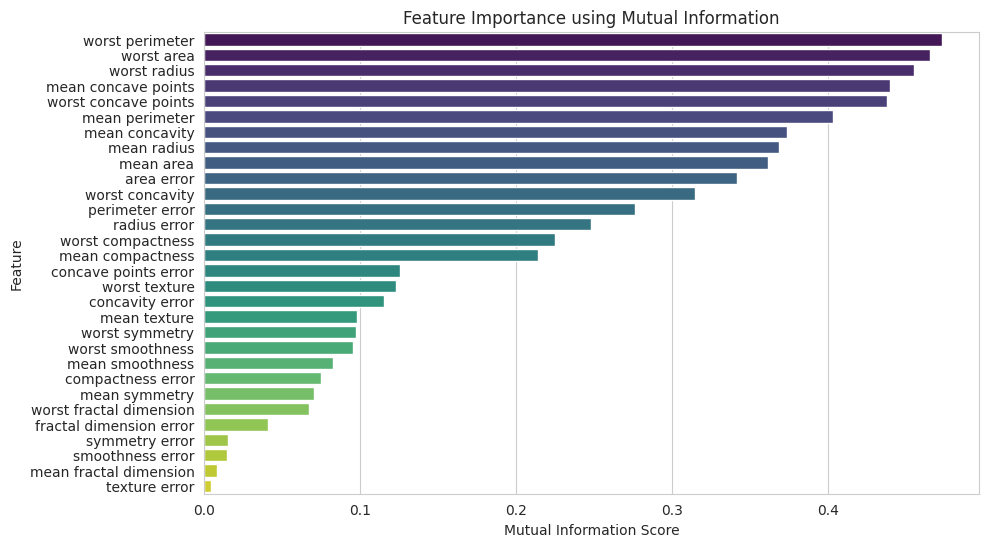

In [78]:
# Explore dependencies among features

# Compute Mutual Information Scores
mi_scores = mutual_info_classif(
    X=df,
    y=breast_cancer_bunch['target']
)

# Convert to a DataFrame for better readability
mi_df = pd.DataFrame({'Feature': breast_cancer_bunch['feature_names'], 'MI Score': mi_scores})

# Sort by MI Score in descending order
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

# Print top 5 most informative features
print("Top 5 Features by Mutual Information:")
print(mi_df.head(5))

# Plot the MI scores
plt.figure(figsize=(10, 6))

sns.barplot(x='MI Score', y='Feature', data=mi_df, palette='viridis')
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title("Feature Importance using Mutual Information")
plt.show()

In [ ]:
# Look at

## Model Training

In [47]:
# Create a PCA model, fit the model
pca = PCA(
    n_components=2,
    random_state=42
)
pca.fit(df_scaled)

# Get the principal components
pca_results = pca.transform(df_scaled)

# Validate - PCA should reduce the number of dimensions (features) in the data
# The model was set up for 2 components
print(f'Original Dimensions: {df_scaled.shape}')
print('')
print(f'PCA Reduced Dimensions: {pca_results.shape}')

Original Dimensions: (569, 30)

PCA Reduced Dimensions: (569, 2)


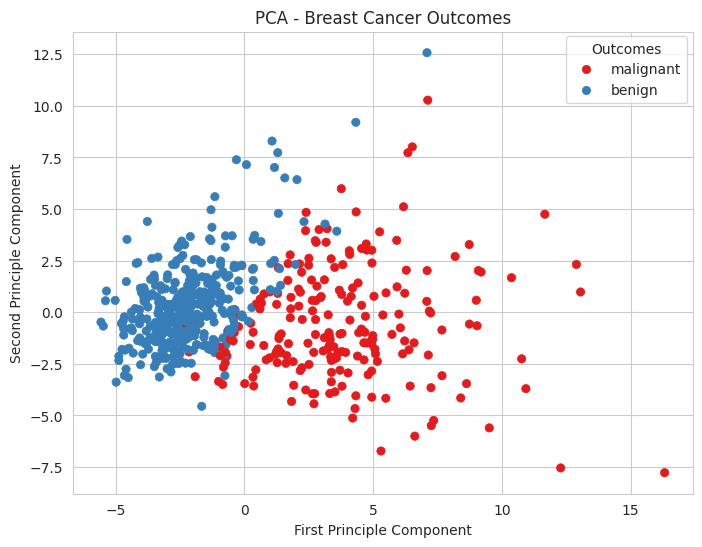

In [48]:
# Plot the components

# Create a DataFrame to support Seaborn
df_plot = pd.DataFrame(
    data=pca_results,
    columns=['Principal Component 1', 'Principal Component 2']
)

#list(plt.colormaps)

# Use subplots to support a legend
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_plot,
    x='Principal Component 1',
    y='Principal Component 2',
    hue=breast_cancer_bunch['target'], # 0 = malignant, 1 = benign
    edgecolor=None,
    palette='Set1'
)


plt.title('PCA - Breast Cancer Outcomes')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

# Fix legend labels
handles, _ = plt.gca().get_legend_handles_labels()

# Move the legend outside the plot
plt.legend(
    bbox_to_anchor=(0.99, 0.99),
    loc='upper right',
    borderaxespad=0,
    handles=handles,
    labels=target_names,
    title='Outcomes'
)

In [51]:
# Retrain for THREE components
# Create a PCA model, fit the model
pca_3 = PCA(
    n_components=3,
    random_state=42
)
pca_3.fit(df_scaled)

# Get the principal components
pca_3_results = pca_3.transform(df_scaled)

# Validate - PCA should reduce the number of dimensions (features) in the data
# The model was set up for 2 components
print(f'Original Dimensions: {df_scaled.shape}')
print('')
print(f'PCA Reduced Dimensions: {pca_3_results.shape}')

Original Dimensions: (569, 30)

PCA Reduced Dimensions: (569, 3)


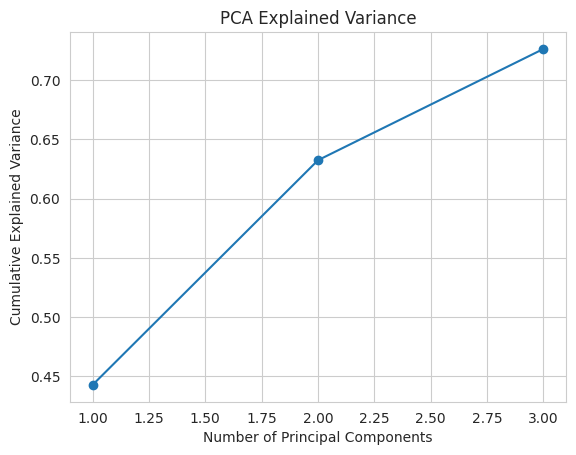

In [52]:
# Explained Variance Ratio
pca_3.explained_variance_ratio_

plt.plot(range(1, 4), np.cumsum(pca_3.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

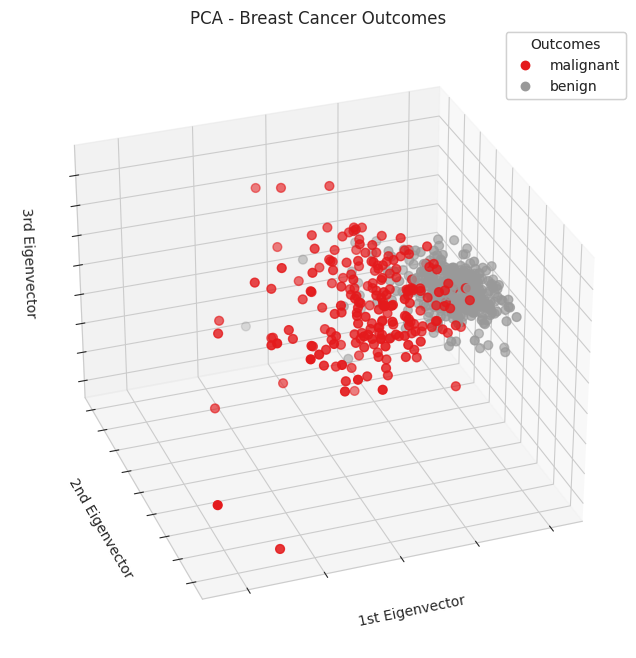

In [77]:
# Reference: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(
    111,
    projection="3d",
    elev=-150,
    azim=110
)

scatter = ax.scatter(
    pca_3_results[:, 0],
    pca_3_results[:, 1],
    pca_3_results[:, 2],
    c=breast_cancer_bunch['target'],
    s=40,
    cmap='Set1'
)

ax.set(
    title="PCA - Breast Cancer Outcomes",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])


# Fix legend labels
handles, _ = plt.gca().get_legend_handles_labels()

# Move the legend outside the plot
legend1 = ax.legend(
    #bbox_to_anchor=(0.99, 0.99),
    loc='upper right',
    borderaxespad=0,
    handles=scatter.legend_elements()[0],
    labels=target_names,
    title='Outcomes'
)
ax.add_artist(legend1)
plt.show()